<a href="https://colab.research.google.com/github/HARDIK218/Projects/blob/main/Quora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/questions.csv')

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.shape

(404351, 6)

In [ ]:
df.dropna(axis = 0, inplace =True)

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df.shape

(404348, 6)

In [ ]:
df =pd.DataFrame(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404348 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404348 non-null  int64 
 1   qid1          404348 non-null  int64 
 2   qid2          404348 non-null  int64 
 3   question1     404348 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404348 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [ ]:
df.drop('id',axis = 1, inplace =True)

In [ ]:
df['qid2'] = df['qid2'].astype(int)
df['is_duplicate'] = df['is_duplicate'].astype(int)
df.tail(5)


,qid1,qid2,question1,question2,is_duplicate
404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,789796,789797,What is one coin?,What's this coin?,0
404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404350,789800,789801,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [ ]:
df.sample(10)

,qid1,qid2,question1,question2,is_duplicate
116215,230372,230373,Why doesn't the Indian government take steps t...,Why isn't Indian government doing anything to ...,1
203300,401131,401132,"Is vacuum energy infinite? If it is, how and w...",If vacuum gravitational and dark energy are cr...,1
269306,529708,529709,What is the difference between split air condi...,Does the average home split or window air cond...,0
374107,731951,731952,Can anyone translate this for me?,Black Lives Matter may have too much on their ...,0
264549,520498,520499,What are the best ways for dealing with social...,What are tips or helpful tools to combat socia...,1
341654,669676,669677,How do I delete every follwing on instagram?,How do you delete someone you are following on...,0
397889,777449,777450,How much does it cost to build a website like ...,How much does it cost to build a website like ...,0
133834,265035,265036,Why does it hurt to love someone?,Why does love hurt so good?,1
229034,451349,451350,To print an artwork in high quality on A4 pape...,How much does it cost a company with a high-sp...,0
316594,621250,621251,From where can I get kuka.sim pro 2.2 version ...,I'm 14 and I am currently working on becoming ...,0


In [ ]:
df['is_duplicate'].value_counts()

0    255042
1    149306
Name: is_duplicate, dtype: int64

In [ ]:
df.duplicated().sum() # to check weather some row is completely duplicate or not

0

In [ ]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100) # calculating percentage

0    63.074876
1    36.925124
Name: is_duplicate, dtype: float64


In [ ]:
# 62% values are not duplicate, 38 are duplicate

In [ ]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_ques = np.unique(qid)
unique_ques_number = unique_ques.shape
print(unique_ques_number)
print(len(qid))

(789795,)
808696


In [ ]:
repeated = len(qid) - unique_ques_number[0]
repeated

18901

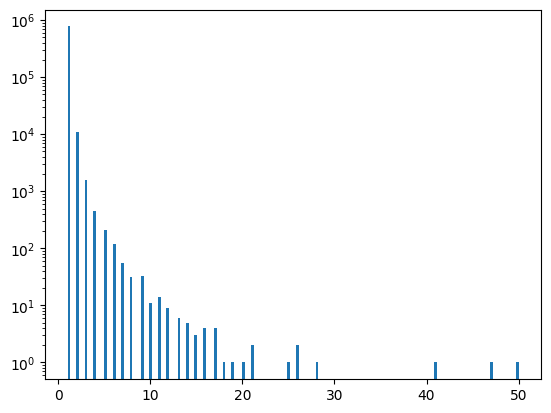

In [ ]:
plt.hist(qid.value_counts().values, bins =160)
plt.yscale('log')
plt.show()

In [ ]:
df = df[['question1','question2','is_duplicate']]
df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404346,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,What is one coin?,What's this coin?,0
404349,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
new_df = df.sample(100000, random_state=2)

In [ ]:
x = new_df[['question1','question2']]
x

,question1,question2
302477,What are kalman filters used for?,What are examples of filters used in a home?
369857,How do Relationship work?,What matters in the life most dignity or money?
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132567,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...
...,...,...
314121,What are the best monospace or fixed-width fon...,Are monospace or proportional fonts better for...
142895,How is Christmas celebrated in Mexico?,How is Christmas celebrated?
43027,How do you identify a closeted gay person?,I am a closet Christian. How do I tell my gay ...
154199,What is a suitable inpatient drug and alcohol ...,What is a suitable inpatient drug and alcohol ...


In [ ]:
y = new_df['is_duplicate']
type(y)


pandas.core.series.Series

In [ ]:
def remove_punctuation(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [ ]:
new_df['question1'] = new_df['question1'].apply(remove_punctuation)
new_df['question2'] = new_df['question2'].apply(remove_punctuation)




In [ ]:
sw = stopwords.words('english')
def remove_stopwords(text):

    words = word_tokenize(text)
    wo_stopwords = [word for word in words if word.lower not in sw]

    return " ".join(wo_stopwords)

In [ ]:
# new_df['question1'] = new_df['question1'].apply(remove_stopwords)
# new_df['question2'] = new_df['question2'].apply(remove_stopwords)



In [ ]:
def num_words(text):
  words = word_tokenize(text)
  num = len(words)
  return num
new_df['numberofwords1'] = new_df['question1'].apply(num_words)
new_df['numberofwords2'] = new_df['question2'].apply(num_words)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
questions = list(new_df['question1']) + list(new_df['question2'])

q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)
q1_arr



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index=new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=new_df.index)

In [ ]:
temp_df = pd.concat([temp_df1,temp_df2], axis = 1)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df['num_words'] = new_df['numberofwords1'] + new_df['numberofwords2']


temp_df

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate,num_words
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,18
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,28


In [ ]:
def num_char(text):
  characters = list(text)
  num_char = len(characters)
  return num_char


In [ ]:
new_df['numberofchar1'] = new_df['question1'].apply(num_char)
new_df['numberofchar2'] = new_df['question2'].apply(num_char)

In [ ]:
temp_df['num_char1'] = new_df['numberofchar1']
temp_df['num_char2'] = new_df['numberofchar2']

In [ ]:
def count_common_words(row, col1, col2):
    words1 = set(re.findall(r'\w+', row[col1].lower()))
    words2 = set(re.findall(r'\w+', row[col2].lower()))
    common_words = words1.intersection(words2)
    return len(common_words)



In [ ]:
temp_df['CommonWordsCount'] = new_df.apply(count_common_words, args=('question1', 'question2'), axis=1)


In [ ]:
temp_df['word_share'] = temp_df['CommonWordsCount']/temp_df['num_words']

In [ ]:
temp_df['wordsin1'] = new_df['numberofwords1']
temp_df['wordsin2'] = new_df['numberofwords2']

In [ ]:
temp_df['unique_words'] = temp_df['num_words'] - temp_df['CommonWordsCount']

In [ ]:
temp_df['uniqueness_per_word'] = temp_df['unique_words']/temp_df['num_words']

In [ ]:
temp_df.columns = temp_df.columns.astype(str)


In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,is_duplicate,num_words,num_char1,num_char2,CommonWordsCount,word_share,wordsin1,wordsin2,unique_words,uniqueness_per_word
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,15,32,43,4,0.266667,6,9,11,0.733333
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,13,24,46,0,0.000000,4,9,13,1.000000
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,40,105,104,18,0.450000,20,20,22,0.550000
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,18,44,59,6,0.333333,8,10,12,0.666667
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,26,70,83,6,0.230769,12,14,20,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,20,70,58,6,0.300000,12,8,14,0.700000
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,10,37,27,4,0.400000,6,4,6,0.600000
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,41,73,4,0.160000,8,17,21,0.840000
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,28,79,80,13,0.464286,14,14,15,0.535714


In [ ]:
X = temp_df.drop(columns = ['is_duplicate'], axis=1)
X.shape

(30000, 6009)

In [ ]:
Y = temp_df['is_duplicate']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.35, random_state = 43)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()


In [ ]:
classifier.add(Dense(6009,activation = 'relu', input_shape= (6009,)))
classifier.add(Dense(2000,activation = 'relu'))
classifier.add(Dense(1000,activation = 'relu'))





In [ ]:
classifier.add(Dense(1,activation = 'sigmoid'))
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics= ['accuracy'])

In [ ]:
classifier.build(input_shape = (6009,))

In [ ]:
classifier.fit(x_train, y_train, epochs = 10, validation_data = val_ds)

Epoch 1/10
750/750 [==============================] - 346s 461ms/step - loss: 0.5921 - accuracy: 0.7020
Epoch 2/10
750/750 [==============================] - 346s 462ms/step - loss: 0.4124 - accuracy: 0.7939
Epoch 3/10
750/750 [==============================] - 359s 478ms/step - loss: 0.3132 - accuracy: 0.8443
Epoch 4/10
750/750 [==============================] - 356s 475ms/step - loss: 0.2447 - accuracy: 0.8814
Epoch 5/10
750/750 [==============================] - 356s 475ms/step - loss: 0.1835 - accuracy: 0.9154
Epoch 6/10
750/750 [==============================] - 359s 479ms/step - loss: 0.1272 - accuracy: 0.9474
Epoch 7/10
750/750 [==============================] - 354s 471ms/step - loss: 0.0925 - accuracy: 0.9643
Epoch 8/10
750/750 [==============================] - 361s 481ms/step - loss: 0.0746 - accuracy: 0.9752
Epoch 9/10
750/750 [==============================] - 354s 473ms/step - loss: 0.0514 - accuracy: 0.9828
Epoch 10/10
750/750 [==============================] - 363s 484m

In [ ]:
y_predict = classifier.predict(x_test)

188/188 [==============================] - 11s 58ms/step


In [ ]:
classifier.evaluate(x_test,y_test)

188/188 [==============================] - 11s 58ms/step - loss: 2.7109 - accuracy: 0.7338


[2.7108774185180664, 0.7338333129882812]

In [ ]:
temp_df

In [ ]:
temp_df[['num_words','num_char1','num_char2','word_share','CommonWordsCount', 'wordsin1','wordsin2','unique_words','uniqueness_per_word']].describe()

,num_words,num_char1,num_char2,word_share,CommonWordsCount,wordsin1,wordsin2,unique_words,uniqueness_per_word
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,22.048133,57.88470,58.266467,0.234845,4.852333,10.919733,11.128400,17.19580,0.765155
std,10.048452,29.46421,32.834042,0.125519,3.081262,5.458090,6.238297,9.25261,0.125519
min,5.000000,0.00000,8.000000,0.000000,0.000000,0.000000,1.000000,3.00000,0.500000
25%,16.000000,38.00000,38.000000,0.138462,3.000000,7.000000,7.000000,11.00000,0.666667
50%,20.000000,50.00000,49.000000,0.230769,4.000000,10.000000,9.000000,15.00000,0.769231
75%,26.000000,70.00000,70.000000,0.333333,6.000000,13.000000,13.000000,21.00000,0.861538
max,255.000000,421.00000,1130.000000,0.500000,40.000000,79.000000,228.000000,242.00000,1.000000


In [ ]:
correlation = temp_df[['num_words',	'num_char1',	'num_char2',	'word_share','unique_words'	,'CommonWordsCount', 'wordsin1','wordsin2','is_duplicate','uniqueness_per_word']].corr()
correlation['is_duplicate']
